In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy import fftpack


1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The probability of getting 15 or more hurricanes in a year is 0.08444930803584327 %


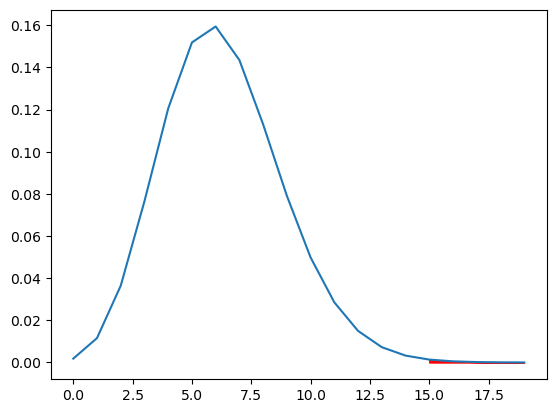

In [23]:
from scipy.stats import poisson
# poisson distribution data for y-axis

y = poisson.cdf(15,mu=6.3)
print("The probability of getting 15 or more hurricanes in a year is",100-y*100, "%")


x = np.arange(0,20)
y = poisson.pmf(x,mu=6.3)

plt.plot(x,y)
plt.fill_between(range(15,20), y[15:20], interpolate=True, color='red')
plt.show()


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [18]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

In [23]:
t_value, p_value = stats.ttest_rel(pre, post)
if np.abs(t_value) > 1.96:
    print("The result is statistically relevant")
else:
    print("The result is not statistically relevant")



The result is statistically relevant


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [35]:
def getfreq(signal, timestep):
    sig_fft = fftpack.fft(signal)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval
    #print(power)
    # The return the corresponding frequencies
    sample_freq = fftpack.fftfreq(signal.size, d=timestep)
    #print(sample_freq)
    # Find the peak frequency: focus only on only the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    # find the max of freqs array
    peak_freq = freqs[powes.argmax()]
    #print("Peak frequency:", peak_freq)
    return peak_freq

In [26]:
data = np.loadtxt("./populations.txt")

year = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]
time_step = 0.05




In [27]:
#Finding the percived frequancy of years
peak = 1
ts = 0.05
distmin = 1
for i in range(1000):
    peak = getfreq(year,ts)
    dist = np.abs(1-peak)
    if dist < distmin:
        distmin = dist
        bestts = ts
        #print("Peak frequency:", peak)
    if peak > 1:
        ts  = ts*1.01
    else:
        ts = ts*0.99
print("Recommended timestep:",bestts)



Peak frequency: 0.9523809523809523
Peak frequency: 0.962000962000962
Peak frequency: 0.9717181434353153
Peak frequency: 0.98153347821749
Peak frequency: 0.9914479577954446
Peak frequency: 1.001462583631762
Peak frequency: 0.9986125027342143
Peak frequency: 0.9987123739716116
Peak frequency: 0.9988122551971313
Peak frequency: 0.9989121464117726
Peak frequency: 0.9990120476165342
Peak frequency: 0.9991119588124154
Peak frequency: 0.9992118800004155
Peak frequency: 0.9993118111815338
Peak frequency: 0.9994117523567695
Peak frequency: 0.9995117035271222
Peak frequency: 0.9996116646935916
Peak frequency: 0.9997116358571774
Peak frequency: 0.9998116170188791
Peak frequency: 0.9999116081796972
Peak frequency: 1.000011609340631
Recommended timestep: 0.04761849479972115


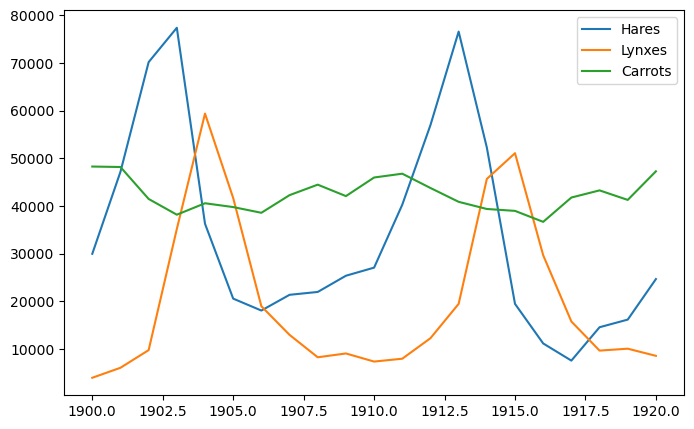

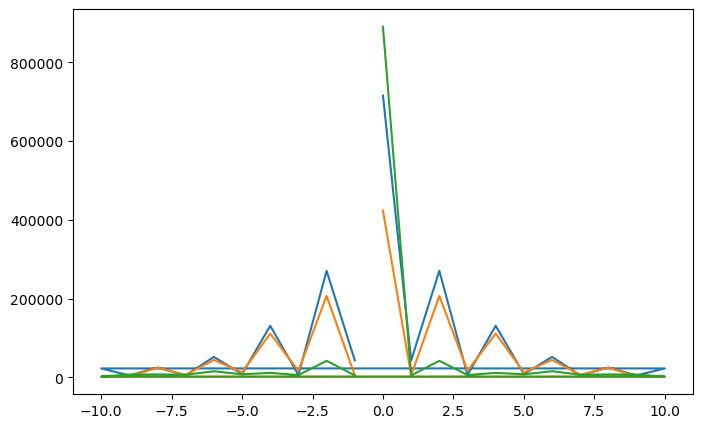

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(year,hares,label = "Hares")
plt.plot(year,lynxes,label = "Lynxes")
plt.plot(year,carrots,label = "Carrots")
plt.legend()
plt.show()

sample_freq2 = fftpack.fftfreq(year.size, bestts)

plt.figure(figsize=(8, 5))
plt.plot(sample_freq2, abs(fftpack.fft(hares)),label = 'hares')
plt.plot(sample_freq2, abs(fftpack.fft(lynxes)), label = 'lynxes')
plt.plot(sample_freq2, abs(fftpack.fft(carrots)), label = 'Carrots')
plt.show()


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

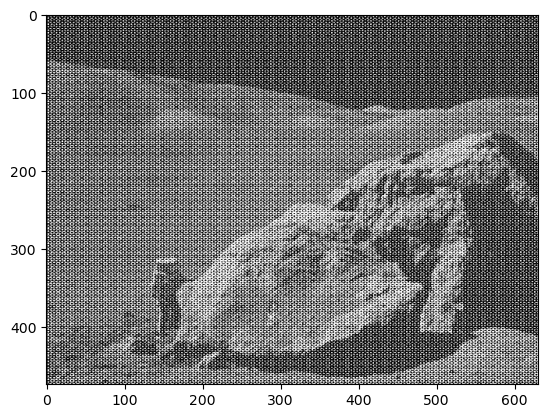

In [5]:
image = plt.imread("moonlanding.png")
plt.imshow(image, plt.cm.gray)
plt.show()

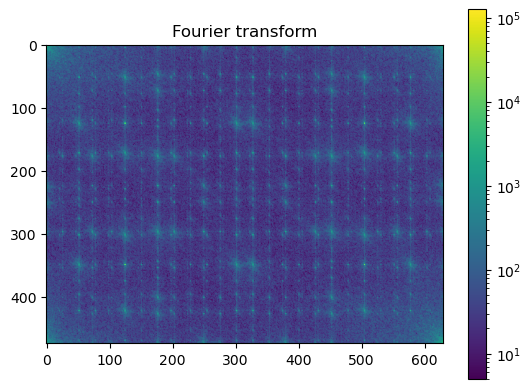

In [6]:

im_fft = fftpack.fft2(image)
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

#plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')
plt.show()

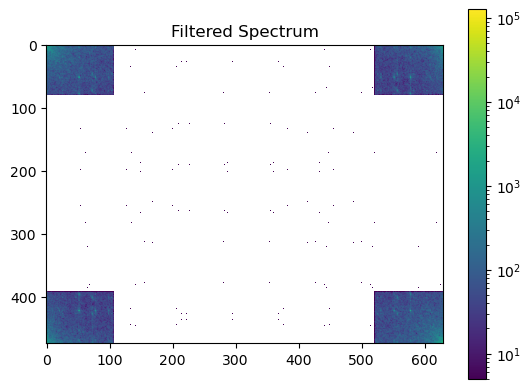

In [7]:
keep_fraction = 0.17

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

#plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')
plt.show()

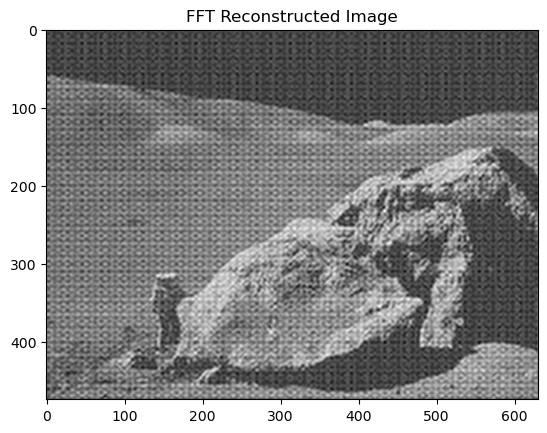

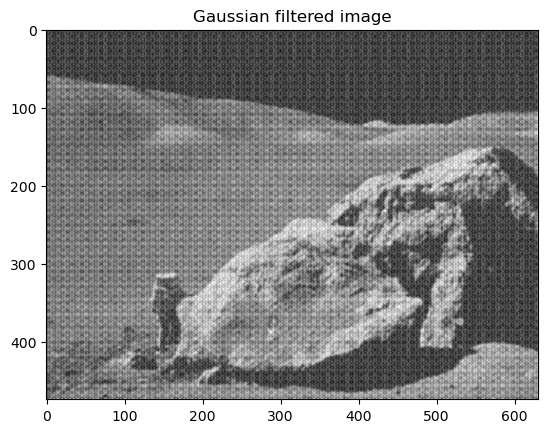

In [16]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

#figura, axes = plt.subplots(1, 2)
#figura.set_size_inches(19, 6)
#plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('FFT Reconstructed Image')
plt.show()
#We can also use a gaussian filter and it seems a bit better than using the manual fourier transform

from scipy import ndimage
im_blur = ndimage.gaussian_filter(image, 1)
plt.imshow(im_blur, plt.cm.gray)
plt.title('Gaussian filtered image')

plt.show()
